In [2]:
import joblib
import pandas as pd
import sys
import pathlib
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

project_root = pathlib.Path().resolve().parent
sys.path.append(str(project_root))
from forest_cover_pred.metrics_tab import compute_metrics_multiclass, save_metrics
from sklearn.model_selection import train_test_split

#load test data
data = pd.read_csv("../data/interim/test_split.csv")
x_test = data.drop(columns=["Cover_Type"])
y_test = data["Cover_Type"]
metrics_folder = "../reports/metrics/"

2025-12-12 20:19:10.559 | INFO     | forest_cover_pred.config:<module>:11 - PROJ_ROOT path is: /home/anuja/ml/forest_cover_prediction


In [6]:
lg_model = joblib.load("../models/logreg_multiclass.joblib")
y_pred = lg_model.predict(x_test)
y_pred_prob = lg_model.predict_proba(x_test)

# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print("AUC Score: ", roc_auc_score(y_test_bin, y_pred_prob, multi_class = 'ovr'))
model_metrics, per_class_vals = compute_metrics_multiclass("logistic_regression", y_test, y_pred, y_pred_prob)
save_metrics(model_metrics, per_class_vals, metrics_folder )

Saved overall metrics to: ../reports/metrics//overall_metrics.csv
Saved per-class metrics to: ../reports/metrics//per_class_metrics.csv


/home/anuja/ml/forest_cover_prediction/forest_cover_pred/metrics_tab.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_overall = pd.concat([df_overall, pd.DataFrame([asdict(overall_metrics)])], ignore_index=True)
/home/anuja/ml/forest_cover_prediction/forest_cover_pred/metrics_tab.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_perclass = pd.concat([df_perclass, per_class_df], ignore_index=True)


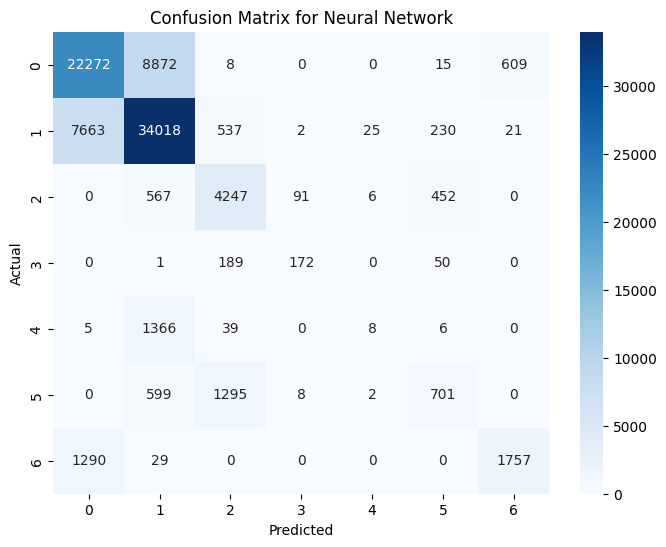

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network")
plt.show()



Saved overall metrics to: ../reports/metrics//overall_metrics.csv
Saved per-class metrics to: ../reports/metrics//per_class_metrics.csv


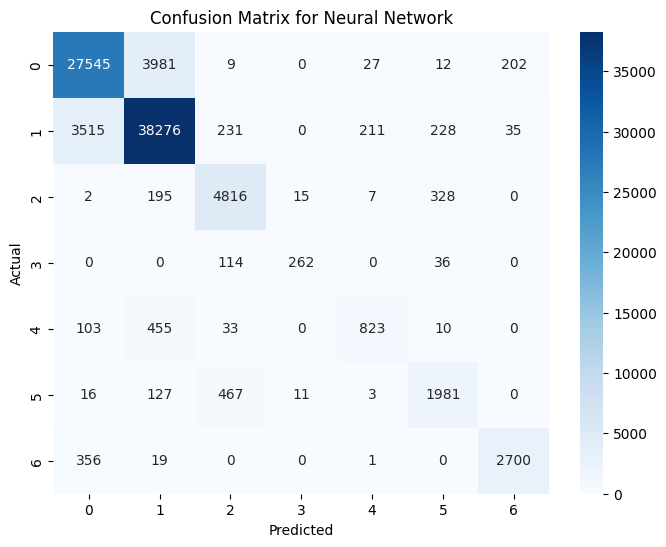

In [3]:
svm_model = joblib.load("../models/mlp_multiclass.joblib")
y_pred = svm_model.predict(x_test)
y_pred_prob = svm_model.predict_proba(x_test)

# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print("AUC Score: ", roc_auc_score(y_test_bin, y_pred_prob, multi_class = 'ovr'))
model_metrics, per_class_vals = compute_metrics_multiclass("svm", y_test, y_pred, y_pred_prob)
save_metrics(model_metrics, per_class_vals, metrics_folder )
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network")
plt.show()



/home/anuja/ml/smoker_status_prediction/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/anuja/ml/smoker_status_prediction/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Saved overall metrics to: ../reports/metrics//overall_metrics.csv
Saved per-class metrics to: ../reports/metrics//per_class_metrics.csv


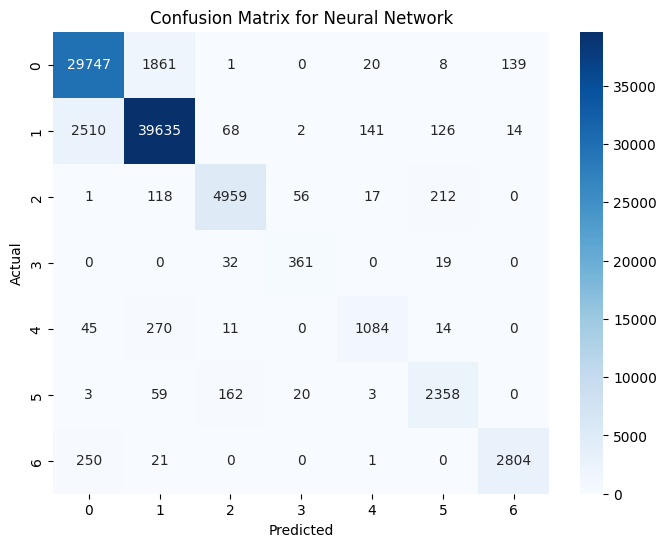

In [4]:
mlp_model = joblib.load("../models/mpl_tuned_optuna.joblib")
y_pred = mlp_model.predict(x_test)
y_pred_prob = mlp_model.predict_proba(x_test)

# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print("AUC Score: ", roc_auc_score(y_test_bin, y_pred_prob, multi_class = 'ovr'))
model_metrics, per_class_vals = compute_metrics_multiclass("mlp_tuned", y_test, y_pred, y_pred_prob)
save_metrics(model_metrics, per_class_vals, metrics_folder )
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network")
plt.show()